<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Neurons-and-Firing-frequency" data-toc-modified-id="Exercise-1:-Neurons-and-Firing-frequency-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1: Neurons and Firing frequency</a></span></li><li><span><a href="#Recap" data-toc-modified-id="Recap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap</a></span></li><li><span><a href="#LAB-01,-Frequency-Input-and-Frequency-Frequency" data-toc-modified-id="LAB-01,-Frequency-Input-and-Frequency-Frequency-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LAB 01, Frequency-Input and Frequency-Frequency</a></span><ul class="toc-item"><li><span><a href="#Frequency-Input-curve-of-an-integrate-and-fire-neuron." data-toc-modified-id="Frequency-Input-curve-of-an-integrate-and-fire-neuron.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Frequency-Input curve of an integrate-and-fire neuron.</a></span></li><li><span><a href="#Frequency-Frequency-curve-of-an-integrate-and-fire-neuron." data-toc-modified-id="Frequency-Frequency-curve-of-an-integrate-and-fire-neuron.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Frequency-Frequency curve of an integrate-and-fire neuron.</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Submission</a></span></li></ul></li></ul></div>

# Exercise 1: Neurons and Firing frequency


Prepared by  **Maryada, Farah Baracat, Jingyue Zhao, Elisa Donati and Giacomo Indiveri**


_The Institute of Neuroinformatics, University of Zurich and ETH Zurich_

[Contact Us](https://www.ini.uzh.ch/en/research/groups/ncs/people.html)

<div class="alert alert-block alert-success">
In this exercise we will use tools from neuroscience community to learn some dynamics of spiking neurons. 
    
- <b>PART A:</b> Simulate and monitor an <b>integrate-and-fire neuron (IAF) neuron </b>, and plot its "Frequency-Input (FI) curve".


- <b>PART B:</b> Simulate a neuron with one excitatory synapse and do a Frequency-Frequency (FF) curve. Observe how the curve varies for:
    - Different synaptic weights.
    - Refactory period 
</div>

So, let's start with importing Brian2.

In [1]:
from brian2 import *
import numpy
%matplotlib inline

### Integrate-and-fire (leaky I&F)  neuron model
Let’s start by defining the neuron model. In Brian, all models are defined by systems of differential equations. Here’s a simple example of an integrate-and-fire neuron model:

<img src='./IAF.png'/>

### Equation
<div style="font-size:25px;">
$$\tau_{m} \frac{dv}{dt} = - v(t) + V_{ext}$$
</div>

<div class="alert alert-block alert-warning">
 <b>How this works:</b>.
<br/>
Neuronal dynamics can be conceived as a <b>summation process</b> (sometimes also called ‘integration’ process) combined with a mechanism that triggers action potentials above some <b>critical voltage</b>. 
    
For more details and derivation:  

https://neuronaldynamics.epfl.ch/online/Ch1.S3.html

</div>

# Recap

***
<p style="color:orange;font-size:20px;"> Before we begin, Checklist from Lab00 session </p>

***

- A *NeuronGroup* with "any" neuonal dynamics defined using a differential equation. 
- A *Synapse* used to connect two groups, could be two neuron groups or input stimuli
- A *Monitor* to "read" output from a NeuronGroup
- Plotting the output

<p style="color:red;font-size:20px;"> Have you already tried simulating <b> multiple runs</b>?</p>

**IMPORTANT** Concepts
- Store and Restore
- Network object

# LAB 01, Frequency-Input and Frequency-Frequency 

## Frequency-Input curve of an integrate-and-fire neuron.

***
**Step 1:** Define an equation integrate-and-fire neuron (LIF) with an input parameter $V_{ext}$ (in $volt$), neuron time constant as $\tau$ = 20 $ms$ and membrane voltage as $v$ (in $volt$)
***

In [2]:
## Add your code here
tau = 10*ms
eqs = """
dv/dt = (-v + Vext)/tau : volt
"""


***
**Step 2:** Create a NeuronGroup with resting potential set to $0mV$, refractory period as $5ms$ and threshold for spiking is set to $15mV$

***

In [3]:
## Add your code here
Vrst = 0 * volt
Vth  = 0.15 * volt
G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')

***
<b> Step 3: </b> Study the effect of external input
***
    
<b> Step 3A: </b> Induce input of amplitude with different values:  $14mV$, $15mV$, $16mV$ and $20mV$ (or more) and simulate for a duration of $500ms$  <br/>
<b> Step 3B: </b>Use <b>StateMonitor</b> to obsever change in $v$ in addition to SpikeMonitor. <br/>
<b> Step 3C: </b>Save plots for the values mentioned in Step 3A. Label the axes and set title of the plot as amplitute value.

***

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


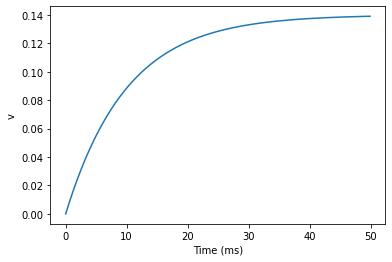

In [4]:
## Add your code here

start_scope()

tau = 10 * ms
Vext = 0.14 * volt
Vrst = 0 * volt
Vth  = 0.15 * volt


eqs = """
dv/dt = (-v + Vext)/tau : volt
"""

G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')
M = StateMonitor(G, 'v', record=0)

run(50*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

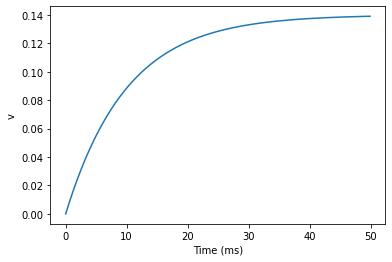

In [5]:
## Add your code here

start_scope()

tau = 10 * ms
Vext = 0.15 * volt
Vrst = 0 * volt
Vth  = 0.15 * volt


eqs = """
dv/dt = (-v + Vext)/tau : volt
"""

G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')
M = StateMonitor(G, 'v', record=0)

run(50*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [ ]:
## Add your code here

start_scope()

tau = 10 * ms
Vext = 0.16 * volt
Vrst = 0 * volt
Vth  = 0.15 * volt


eqs = """
dv/dt = (-v + Vext)/tau : volt
"""

G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')
M = StateMonitor(G, 'v', record=0)

run(50*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [ ]:
## Add your code here

start_scope()

tau = 10 * ms
Vext = 0.20 * volt
Vrst = 0 * volt
Vth  = 0.15 * volt


eqs = """
dv/dt = (-v + Vext)/tau : volt
"""

G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')
M = StateMonitor(G, 'v', record=0)

run(50*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

<div class="alert alert-block alert-success">
    
<b>Answer the following as a Markdown cell</b>. 
- Explain the behaviour around $15mV$. Why does the behaviour vary for $14mV$ and $16mV$.
- What value would you change to achieve similar behaviour at $20mV$ instead of $15mV$  
</div>

***
**Add your explaination here**
***

<div class="alert alert-block alert-info">
    In my opinion, the neuron fires and thus reset if it's potential reaches 15 mV. If we solve the equation of the leaky integrate and fire neuron we will see that v has an exponential curve with $\lim_{t \rightarrow \infty} v(t) = V_{ext}$. So if $V_{ext} = 14mV$ or $V_{ext} = 15mV$, the potential will not cross the threshold $V_{th} = 15mV$ in a realistic time.
</div>

<div class="alert alert-block alert-info">
    For $V_{ext} = 16mV$, we see that the potential overcomes the threshold once and thus reset. $V_{ext} = 20mV$, it reaches the threshold multiple times.
</div>

<div class="alert alert-block alert-info">
    To get the same behaviour at $20mV$ instead of $15mV$, we should increase the threshold to a value $V_{th} >= 20mV$

</div>

***
<b> Step 4: </b> Plot the <b>Frequency-Input</b> curve with input ranging from $0$ ~ $30 mV$? Feel free to pick the step size. Simulation duration = 1 second  <br/><br/> 
    <b>Option 1: </b> Create a NeuronGroup with N (neuron count) ~ different values of input and run <i> a single </i> simulation. <br/>
    <b>Option 2: </b> Encapsulate all components in a <b>Network</b> object. Use store and restore technique
<br/>
<br/>
    <b>Note:</b> Time the two methods and see if the two gives same results or not. 
***

<p style="color:red;font-size:20px;"> 
Fill the code lines where you see a #hash. Or use your own style.
<br/><br/>
During the class, please only do one of the two option and move to section 3.2 
 </p>

### TODO: Plot the Frequency-Input curve, multiple runs of 1 neuron

0. V : 0
1. mV : 0
2. mV : 0
3. mV : 0
4. mV : 0
5. mV : 0
6. mV : 0
7. mV : 0
8. mV : 0
9. mV : 0
10. mV : 0
11. mV : 0
12. mV : 0
13. mV : 0
14. mV : 0
15. mV : 0
16. mV : 18
17. mV : 23
18. mV : 27
19. mV : 32
20. mV : 35
21. mV : 39
22. mV : 43
23. mV : 47
24. mV : 50
25. mV : 54
26. mV : 57
27. mV : 61
28. mV : 64
29. mV : 68


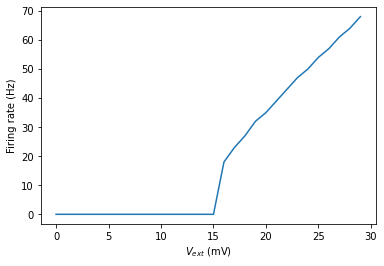

In [19]:
start_scope()

duration = 1*second # set time duration

tau = 20*ms
step = 1 # set step size, MY NOTE: no need of unit because it's used below as an int
Vrst = 0 * volt
Vth  = 15 * mV

#Iext_range = np.arange(0, 30, step)*mV
# WARNING: Guess there's a mistake Iext should be Vext
Vext_range = np.arange(0, 30, step)*mV
Vext = Vext_range[-1]

firing_rates = []
eqs = """
dv/dt = (-v + Vext)/tau : volt
"""
# DEFINE NEURON GROUP
G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')

# DEFINE MONITOR
state_M = StateMonitor(G, 'v', record=0)
spike_M = SpikeMonitor(G)

# CREATE NETWORK

# STORE the current state of the network
store()

#for Iext in Iext_range:
# WARNING: Same
for Vext in Vext_range:
    # RESTORE
    restore()
    # SIMULATE
    run(duration)
    #SAVE DATA for current run
    print(f"{Vext} : {spike_M.num_spikes}")
    firing_rates.append(spike_M.num_spikes/second)
    xlabel('Time (ms)')
    ylabel('v');

# PLOT
plot(Vext_range/mV, firing_rates)
xlabel(r'$V_{ext}$ (mV)')
ylabel('Firing rate (Hz)')
show()


0. V : 0
1. mV : 0
2. mV : 0
3. mV : 0
4. mV : 0
5. mV : 0
6. mV : 0
7. mV : 0
8. mV : 0
9. mV : 0
10. mV : 0
11. mV : 0
12. mV : 0
13. mV : 0
14. mV : 0
15. mV : 0
16. mV : 18
17. mV : 23
18. mV : 27
19. mV : 32
20. mV : 35
21. mV : 39
22. mV : 40
23. mV : 40
24. mV : 40
25. mV : 40
26. mV : 40
27. mV : 40
28. mV : 40
29. mV : 40


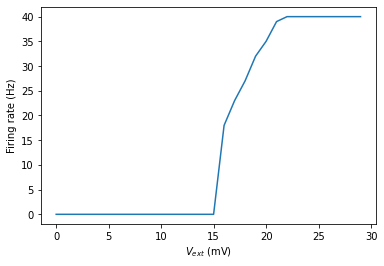

In [21]:
start_scope()

duration = 1*second # set time duration

tau = 20*ms
step = 1 # set step size, MY NOTE: no need of unit because it's used below as an int
Vrst = 0 * volt
Vth  = 15 * mV

#Iext_range = np.arange(0, 30, step)*mV
# WARNING: Guess there's a mistake Iext should be Vext
Vext_range = np.arange(0, 30, step)*mV
Vext = Vext_range[-1]

firing_rates = []
eqs = """
dv/dt = (-v + Vext)/tau : volt
"""
# DEFINE NEURON GROUP
G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory=25*ms, threshold='v > Vth')

# DEFINE MONITOR
state_M = StateMonitor(G, 'v', record=0)
spike_M = SpikeMonitor(G)

# CREATE NETWORK

# STORE the current state of the network
store()

#for Iext in Iext_range:
# WARNING: Same
for Vext in Vext_range:
    # RESTORE
    restore()
    # SIMULATE
    run(duration)
    #SAVE DATA for current run
    print(f"{Vext} : {spike_M.num_spikes}")
    firing_rates.append(spike_M.num_spikes/second)
    xlabel('Time (ms)')
    ylabel('v');

# PLOT
plot(Vext_range/mV, firing_rates)
xlabel(r'$V_{ext}$ (mV)')
ylabel('Firing rate (Hz)')
show()


### TODO: Plot the Frequency-Input curve, 1 run of multiple neurons

211
<spikemonitor_1.count: array([ 0,  0,  0,  0,  0, 18, 32, 43, 54, 64], dtype=int32)>


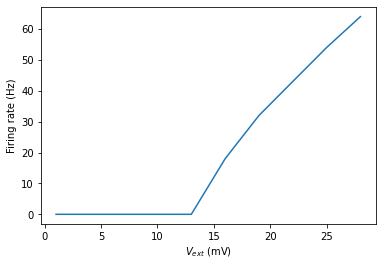

In [29]:
start_scope()

duration = 1*second # set time duration
tau = 20*ms
step = 3 # set step size
Vrst = 0 * volt
Vth  = 15 * mV

Vext_range = np.arange(1, 30, step)*mV

firing_rates = []

# MY NOTE: Now Vext is a variable depending on the neuron, so we have
# to define it's dimension in the equation
eqs = """
dv/dt = (-v + Vext)/tau : volt
Vext : volt
"""

# DEFINE NEURON GROUP
# MY NOTE: As we want to simulate multiple neurons which all have
# their own Vext, we define the same number of neurons as the number
# of Vext in Vext_range that we want to simulate
nb_Vext = len(Vext_range)
nb_neurons = nb_Vext

# MY NOTE: Now Vext is a variable depending on the neuron, so we have
# to define the values it takes for each neuron with `G.Vext`
G = NeuronGroup(nb_neurons, eqs, method='exact',reset='v = Vrst', refractory=5*ms, threshold='v > Vth')
G.Vext = Vext_range

# DEFINE MONITOR
state_M = StateMonitor(G, 'v', record=0)
spike_M = SpikeMonitor(G)

# CREATE NETWORK

# SIMULATE
run(duration)

#SAVE DATA for current run
print(f"{spike_M.num_spikes}")
print(f"{spike_M.count}")

firing_rates = spike_M.count/second # firing rate is count/duration

# PLOT
plot(Vext_range/ms, firing_rates)
xlabel(r'$V_{ext}$ (mV)')
ylabel('Firing rate (Hz)');

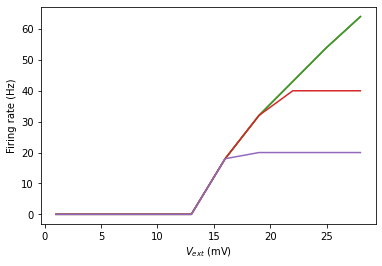

In [28]:
start_scope()

duration = 1*second # set time duration
tau = 20*ms
step = 3 # set step size
Vrst = 0 * volt
Vth  = 15 * mV

Vext_range = np.arange(1, 30, step)*mV
refractory_range = [0,5,10,25,50]*ms

firing_rates_global = []

# MY NOTE: Now Vext is a variable depending on the neuron, so we have
# to define it's dimension in the equation
eqs = """
dv/dt = (-v + Vext)/tau : volt
Vext : volt
"""

# DEFINE NEURON GROUP
# MY NOTE: As we want to simulate multiple neurons which all have
# their own Vext, we define the same number of neurons as the number
# of Vext in Vext_range that we want to simulate
nb_Vext = len(Vext_range)
nb_neurons = nb_Vext

# MY NOTE: Now Vext is a variable depending on the neuron, so we have
# to define the values it takes for each neuron with `G.Vext`
G = NeuronGroup(nb_neurons, eqs, method='exact',reset='v = Vrst', refractory='refractory', threshold='v > Vth')
G.Vext = Vext_range

# DEFINE MONITOR
state_M = StateMonitor(G, 'v', record=0)
spike_M = SpikeMonitor(G)

# CREATE NETWORK

# Store the current state of the network
store()

for refractory in refractory_range:
    firing_rates = []
    # Restore the original state of the network
    restore()
    # Run it with the new value of tau
    run(1*second)
    firing_rates = spike_M.count/second
    plot(Vext_range/ms, firing_rates)


# PLOT
xlabel(r'$V_{ext}$ (mV)')
ylabel('Firing rate (Hz)');

I think that the WARNING is due to the fact that we defined a variable Vext in a previous cell.

<div class="alert alert-block alert-success">

<b>Answer the following as a Markdown cell</b>. 
- Saturation, shape of the curve
- Change refactory period and redo the simulation
</div>

***
**Add your explaination here**
***

<div class="alert alert-block alert-info">

    In my opinion, the curve is increasing with the amplitude of the input. This is explained by the dynamic of the voltage. As tau represents the time for the neuron to get to approximately 63% of the input amplitude. Tau being fixed (at $20 ms$), the time for the neuron to cross the threshold decreases with the increase of the amplitude.
</div>

<div class="alert alert-block alert-info">

    We see a saturation of the curve with the increase of the refractory period. When the refractory period is small the dynamic is given by the input amplitude. But when the refractory period increases, the dynamic of the neuron changes. Because even if the membrane potential increases and crosses the threshold before the end of the neuron's refractory period ends, no spike will be generated. The membrane potential will just continue increasing. (cf. 1-intro-to-brian-neurons.ipynb cell "In [44]"). Thus the neuron has a maximum frequency of $\frac{1}{t_{refractory}}$
</div>

## Frequency-Frequency curve of an integrate-and-fire neuron.

***
**Key points**
***
<div class="alert alert-block alert-warning">

<b>[1]</b> In the next step, we will monitor the <b>Frequency-Frequency curve</b> of the neuron. A Frequency-Frequency curve illustrate relation between firing rate of a neuron <b>w.r.t</b> the frequency of input spikes received by the neuron via the synapse. 
  
<b>[2]</b> Main difference from previous section is: Here we will use a <b>spike generator</b> to generate input spikes as the stimuli which are sent through the synapse to the neuron.

<b>[3]</b> In this case, the Network consist of following elements: a spike generator, a neuron, and a synapse connecting these two.
</div>

***
<b> Step 1:  </b> Define a spike generator and generate spikes such that it produces 100 spikes during 1 second with a constant inter-spike interval (ISI). This will give us an input stimuli of 100 Hz.
    
<i>Remark:</i> In practice, we usually use Poisson distributed spikes to mimic the noisy biological spikes. Feel free to create your own "Poisson-Spike generator"
***


In [30]:
# Add your code here
indices = [0]*100
times = numpy.arange(1,1001,10)*ms
input_G = SpikeGeneratorGroup(1, indices, times)
input_spike_M = SpikeMonitor(input_G)

***
<b> Step 2:  </b> Create a NeuronGroup with resting potential set to $0mV$, refractory period as $5ms$ and threshold for spiking is set to $15mV$
***

In [31]:
# Add your code here
duration = 1*second # set time duration
tau = 20*ms
Vext = 20 * mV
Vrst = 0 * volt
Vth  = 15 * mV
refractory = 5 * ms

eqs = """
dv/dt = (-v + Vext)/tau : volt
"""
G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory='refractory', threshold='v > Vth')

spike_M = SpikeMonitor(G)

***
<b> Step 3A:  </b> Create a Synapse with $w$ as a weight and $delay$ as transmission delays of the synapse. <br/>
    <b> Step 3B:  </b> Make a one-to-one connection among NeuronGroup and SpikeGeneratorGroup.
    <p style='color:red'> <b>IMPORTANT!! <br/><br/>
        Don't forget to add weight parameter where you must </b>  
</p> 

***

In [32]:
# Add your code here
S = Synapses(input_G, G, 'w : volt', on_pre='v_post += w')
S.connect(j='i')
S.w = '0.2'
S.delay = '2*ms'

DimensionMismatchError: The right-hand-side of code statement "w = 0.2" does not have the expected unit m^2 kg s^-3 A^-1 (unit is 1).

<div class="alert alert-block alert-success">

<b>Answer the following as a Markdown cell</b>  
    
What is the unit of your weight parameter? Is it <i>unitless</i>?<br/><br/>
    If <b>yes</b>, can you change it to a physical unit?<br/> If <b>no</b>, can you make it unitless?
</div>

***
**What changes you had to made for this**
***

<div class="alert alert-block alert-info">

    In the tutorial 2-intro-to-brian-synapses, they define v as unitless variable (in the equation "eqs"). But we defined it as a voltage. Thus from the condition v_post += w where w is added to v_post (which is a voltage) we know that w is a voltage.
</div>

***
<b> Step 4: </b> Plot the <b>Frequency-Frequency</b> curve with input ranging from $0$ ~ $200 Hz$? Feel free to pick the step size. Simulation duration = $1 second$ 

 **Copy paste the previous code to save time**
***

WARNING    'spikemonitor_3' has been included in the network but not the object on which it depends.Setting 'spikemonitor_3' to inactive. [brian2.core.magic.dependency_warning]
WARNING    'spikemonitor_2' has been included in the network but not the object on which it depends.Setting 'spikemonitor_2' to inactive. [brian2.core.magic.dependency_warning]
WARNING    'spikemonitor_4' has been included in the network but not the object on which it depends.Setting 'spikemonitor_4' to inactive. [brian2.core.magic.dependency_warning]
WARNING    'spikemonitor_3' has been included in the network but not the object on which it depends.Setting 'spikemonitor_3' to inactive. [brian2.core.magic.dependency_warning]
WARNING    'spikemonitor_2' has been included in the network but not the object on which it depends.Setting 'spikemonitor_2' to inactive. [brian2.core.magic.dependency_warning]
WARNING    'spikemonitor_4' has been included in the network but not the object on which it depends.Setting 'spikem

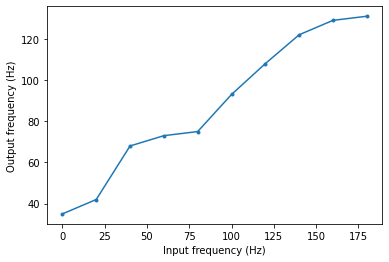

In [37]:
# TODO: plot the FF (output fequency VS input frequency)
start_scope()

input_rate_range = np.arange(0, 200, 20)*Hz
firing_rates = []

duration = 1*second # set time duration
tau = 20*ms
Vext = 20 * mV
Vrst = 0 * volt
Vth  = 15 * mV
refractory = 5 * ms
num_inputs = 1

for input_rate in input_rate_range:
    # Input layer
    input_P = PoissonGroup(num_inputs, rates=input_rate)

    # Ouput Layer
    eqs = """
    dv/dt = (-v + Vext)/tau : volt
    """
    G = NeuronGroup(1, eqs, method='exact',reset='v = Vrst', refractory='refractory', threshold='v > Vth')
    spike_M = SpikeMonitor(G)

    # Connection
    S = Synapses(input_P, G, 'w : volt', on_pre='v_post += w')
    S.connect(j='i') # to precise a one-to-one connection (but in this case it's useless as there are only 2 neurons in the network)
    S.w = '20*mV'
    S.delay = '2*ms'

    run(duration)

    firing_rates.append(spike_M.count/second)


plot(input_rate_range, firing_rates, ".-")
xlabel('Input frequency (Hz)')
ylabel('Output frequency (Hz)')
show()

Note: if you get "MagicError: The magic network contains a mix of objects that has been run before and new objects, Brian does not know whether you want to start a new simulation or continue an old one.", please re-run from the first cell of part 2.

<div class="alert alert-block alert-warning">

***
**In the previous lecture, we discussed that F-F curve may varies based on certain parameters. For instance *synaptic weight*, *time constant*: $\tau$, *refactory period*.**

**To see this in action,**
</div>

<b>Step 5: </b> Plot F-F curve with different synaptic weight **ranging between 2. to 24. value** and plot the corresponding F-F curves in the same figure.
    
<br/>
<i>Hint: If you want, you can use multiple neurons for weight + multiple runs for input rate. </i>

***

In [ ]:
# Add your code here

<div class="alert alert-block alert-success">

<b>Answer the following as a Markdown cell</b>  
    
Do you see variation in neuronal behavior for different values of weights? Can you explain why?<br/><br/>
   
***

</div>

<div class="alert alert-block alert-info">
    #todo
</div>


***

<b>Step 6: [TODO] </b> Repeat the same experiment for different values of refactory period **ranging between 2. to 30. ms** and compare it with your previous plot?
    
<br/>


***

## Submission
Now, let's export the jupyter notebook "week1.ipynb" to HTML format for submission.

In [1]:
!jupyter nbconvert --to html week1-lab_session.ipynb

[NbConvertApp] Converting notebook week1-lab_session.ipynb to html
[NbConvertApp] Writing 585663 bytes to week1-lab_session.html


Please rename the HTML file to "Session01_Lastname_Firstname.html", and then upload your file to your OLAT Drop Box.